In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import savgol_filter

In [22]:
data_all = np.loadtxt('exp_results/PV_2folds_R9_1p2.csv', skiprows = 2, delimiter = ',', usecols = tuple(range(7)))
vol_all = data_all[:,0]
pressure_all = np.mean(data_all[:,1:], axis = 1)


#note: checked and this is averaged correctly w/o any extra volume stuff

R = 8.8 #mm
H = 44.75 #mm
vol_0 = np.pi * R * R * H * 1e-3 #mm^3 * 1000 should be cm^3 aka mL
pressure_0 = pressure_all[0]
print(vol_0)

10.887000845456214


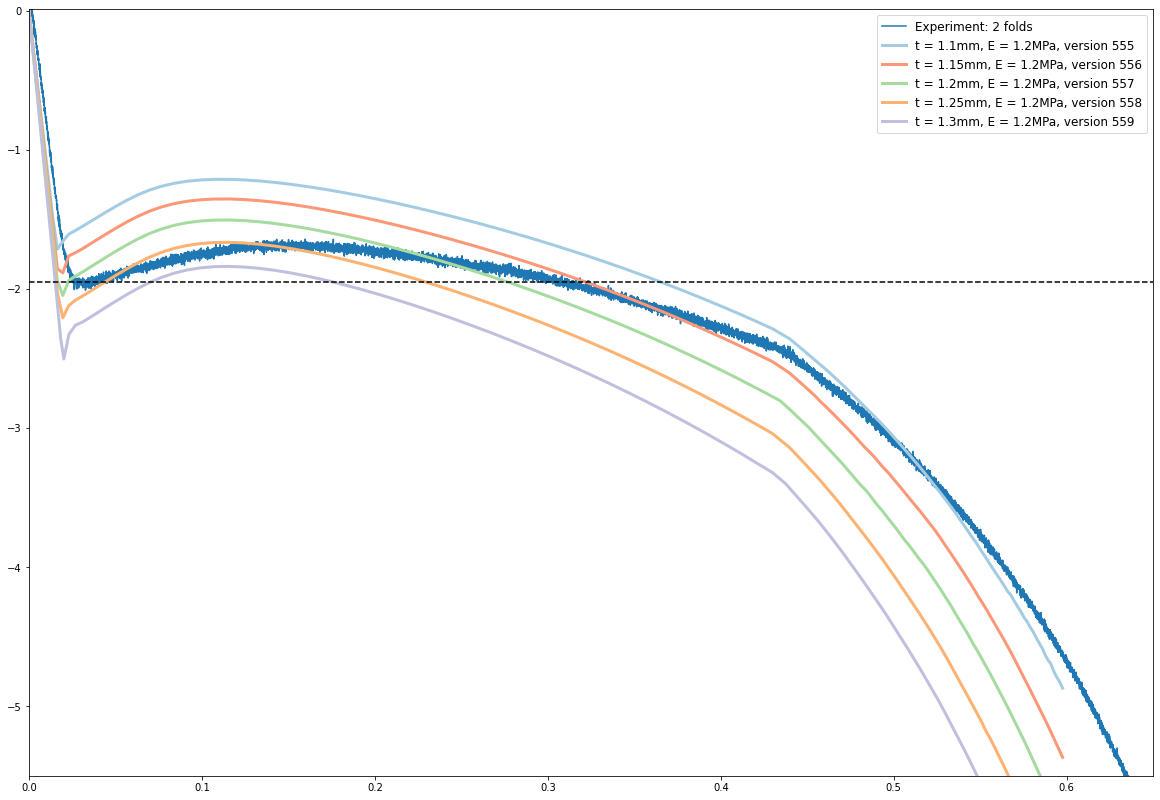

In [59]:
E_try = [1.1, 1.2, 1.3, 1.4]
t_try = [1.1, 1.15, 1.2, 1.25, 1.3]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (16,11), constrained_layout = True)
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

initial_idx = 550
p_cr = 1.8

ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 2 folds')

# ax.plot(vol_all/vol_0, np.mean(data_all[:,1:4], axis = 1), alpha = 0.4)
# ax.plot(vol_all/vol_0, np.mean(data_all[:,4:6], axis = 1), alpha = 0.4)
# ax.plot(vol_all/vol_0, np.mean(data_all[:,6:], axis = 1), alpha = 0.4)

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        if E == 1.2:
            idx_cur = initial_idx + len(t_try)*j + i
            data_cur = np.loadtxt(f'data_out/2fold-fitting-{idx_cur}_pcav_cvol.txt')
            vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
            pressure_kpa = data_cur[:,1] * 1e3
            # print(data_cur[0,0])

            color_plot = plt.get_cmap(cmap_all[i])((j/(len(t_try) - 1))*0.85 + 0.15)
            ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa, version {idx_cur}', color = color_plot,
                linewidth = 3)

ax.hlines(-1.95, 0, 0.7, 'k', '--')
ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.65)
ax.set_ylim(top = 0.01, bottom = -5.5)

fig.savefig('scream yi/2folds_fitting.png', facecolor = 'white')

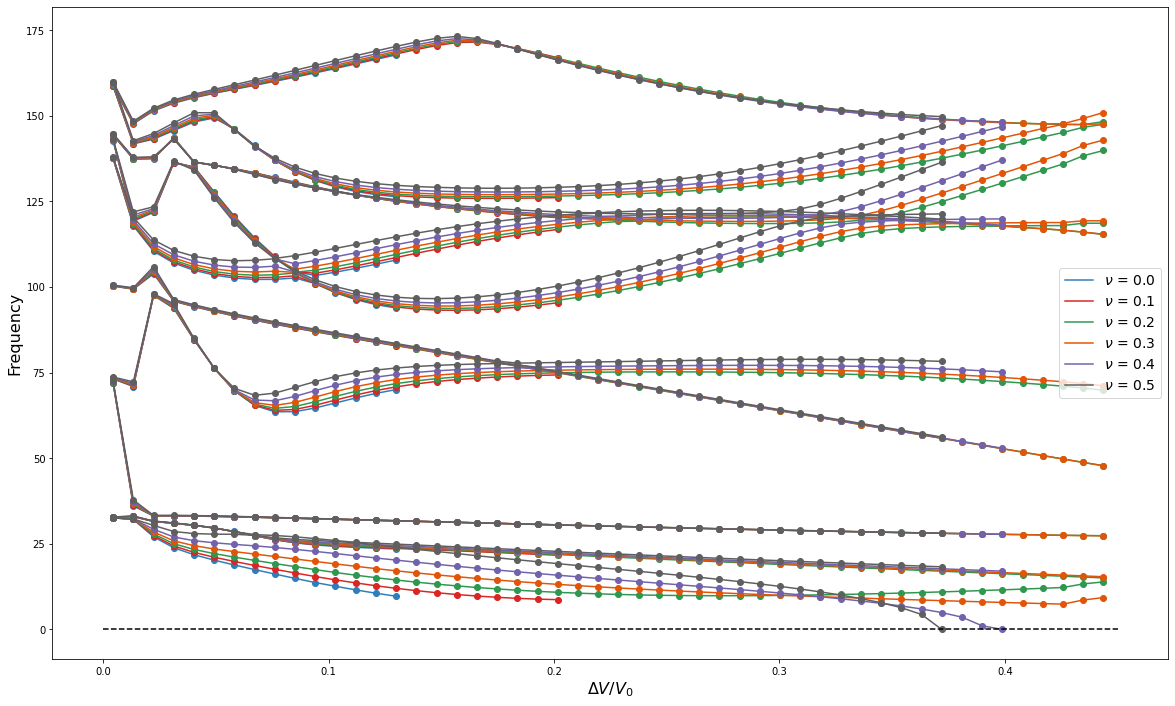

In [58]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 700

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

for i,nu in enumerate(nu_try):
    if nu >= 0.0:
        idx_cur = initial_idx + i
        data_path = f'data_out/2fold-test_nu-{idx_cur}_eig_freq.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)
ax.hlines(0,0,0.45,'k','--')

fig.savefig('data_processed/change_nu_2folds_freq.jpg')


In [12]:
np.shape(data_all[:,1:])[1]

7

(-4.5, 0.01)

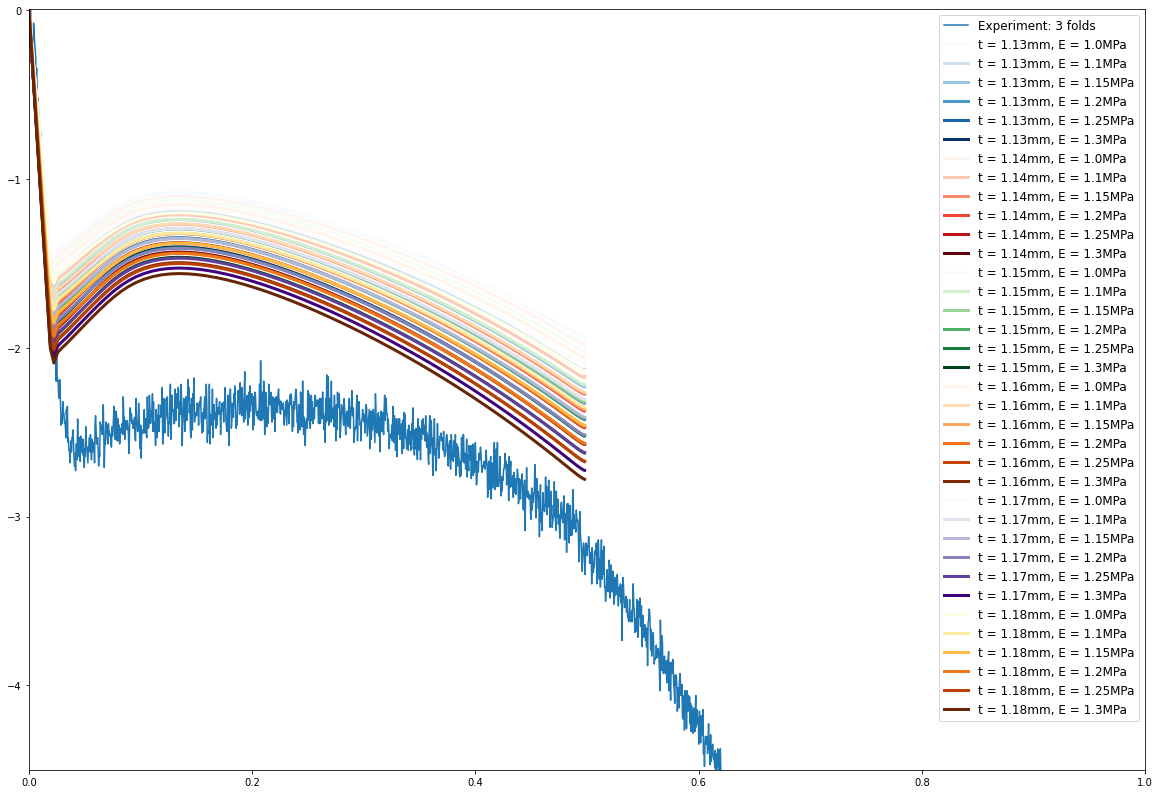

In [3]:
E_try = [1.0, 1.1, 1.15, 1.2, 1.25, 1.3]
t_try = [1.13, 1.14, 1.15, 1.16, 1.17, 1.18]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,14))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

initial_idx = 100


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 2 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(t_try)*j + i
        data_cur = np.loadtxt(f'data_out/2fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)

ax.legend(loc = 'best', fontsize = 12);
ax.set_xlim(left = 0, right = 1)
ax.set_ylim(top = 0.01, bottom = -4.5)

(-4.5, 0.01)

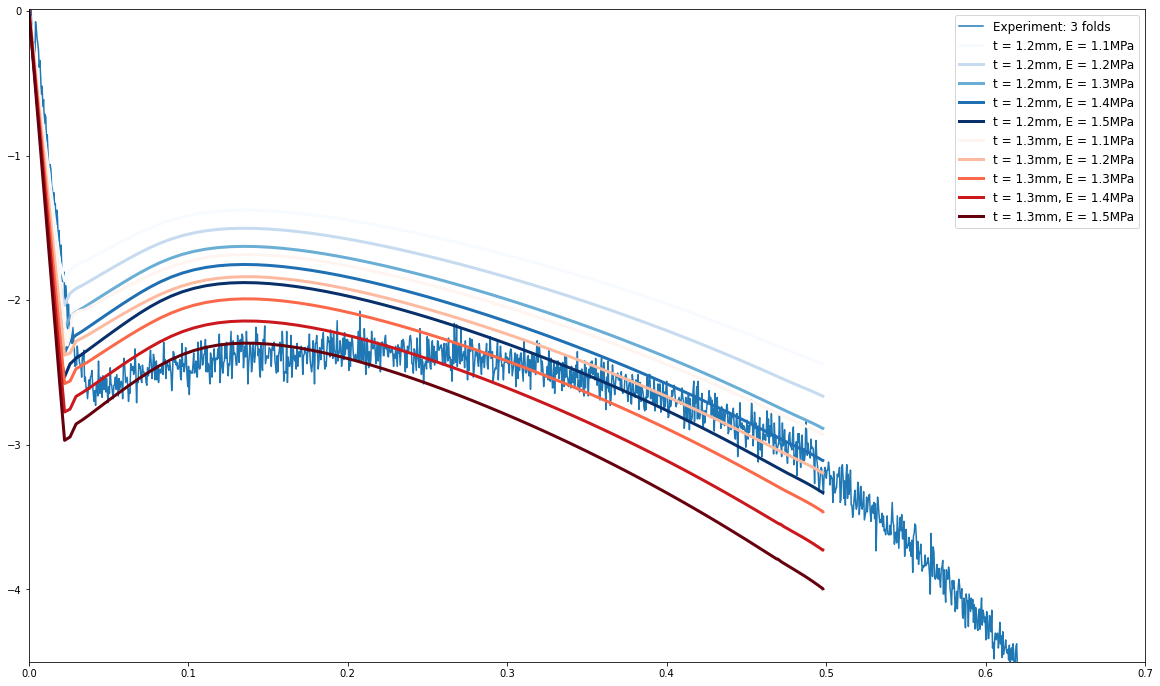

In [4]:
E_try = [1.1,1.2,1.3,1.4,1.5]
t_try = [1.2,1.3,1.4,1.5,1.6]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

initial_idx = 200


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 2 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        if t < 1.4:
            idx_cur = initial_idx + len(t_try)*j + i
            data_cur = np.loadtxt(f'data_out/2fold-fitting-{idx_cur}_pcav_cvol.txt')
            vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
            pressure_kpa = data_cur[:,1] * 1e3

            color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1))
            ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
                linewidth = 3)

ax.legend(loc = 'best', fontsize = 12);
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -4.5)

(-4.5, 0.01)

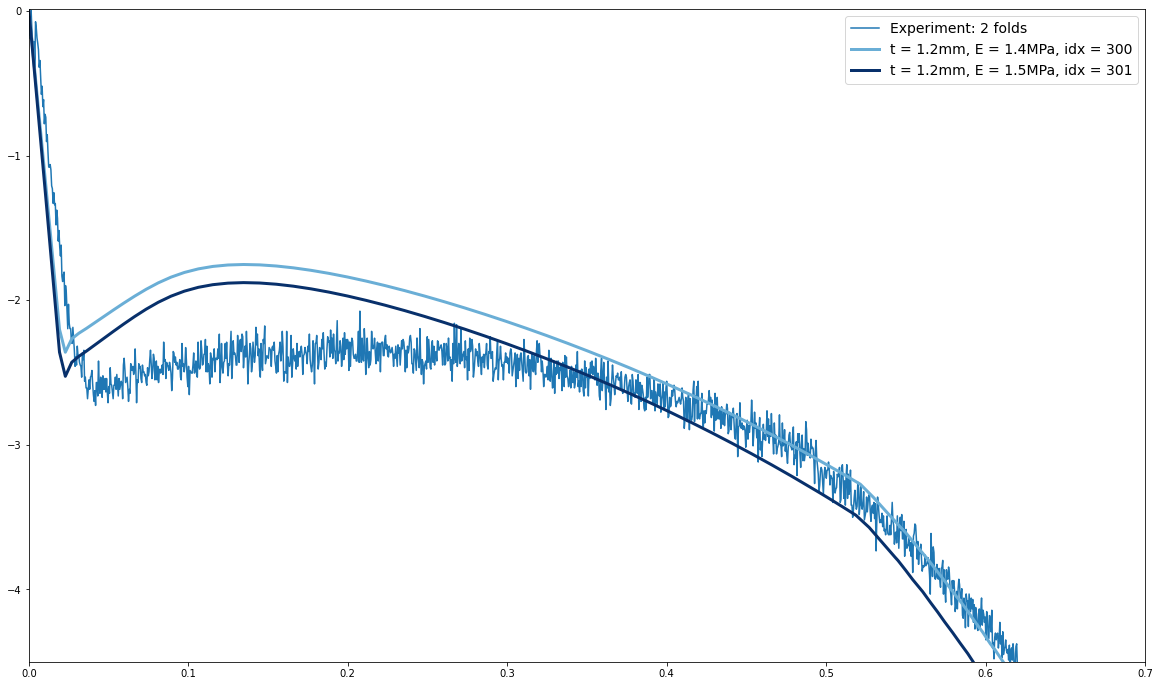

In [5]:
E_try = [1.4, 1.5]
t_try = [1.2]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

initial_idx = 300


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 2 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(t_try)*j + i
        data_cur = np.loadtxt(f'data_out/2fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])((j+1)/((len(E_try))))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa, idx = {idx_cur}', color = color_plot,
            linewidth = 3)

ax.legend(loc = 'best', fontsize = 14);
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -4.5)

(-4.5, 0.01)

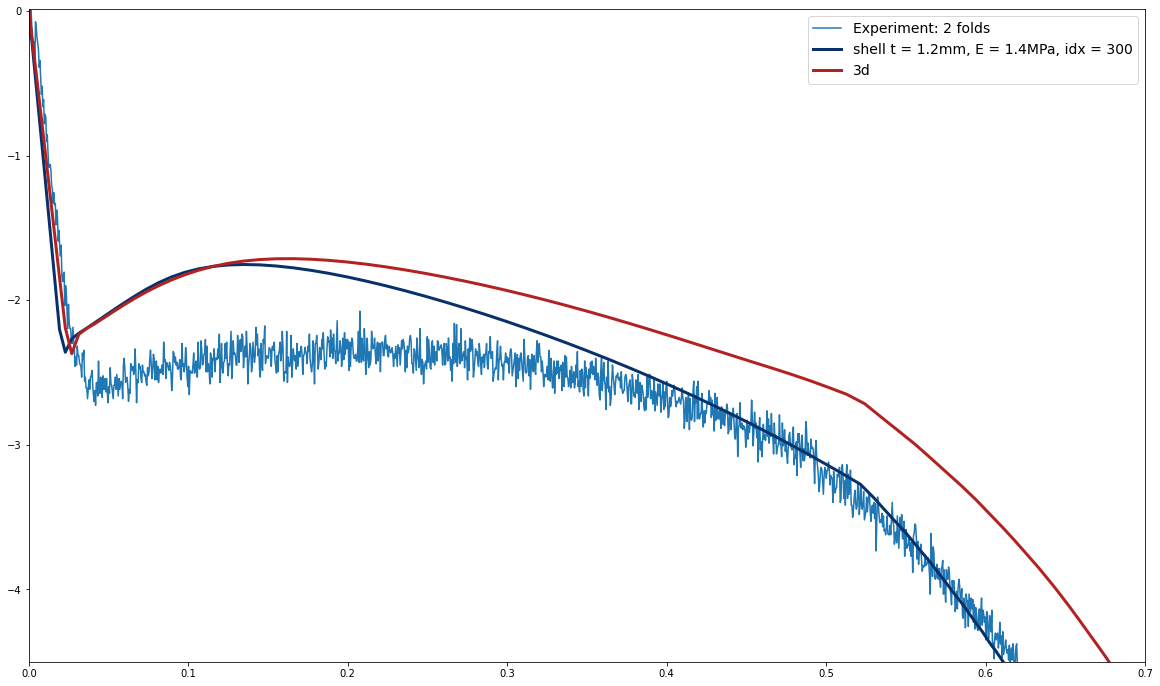

In [14]:
E_try = [1.4]
t_try = [1.2]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

initial_idx = 300


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 2 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(t_try)*j + i
        data_cur = np.loadtxt(f'data_out/2fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])((j+1)/((len(E_try))))
        ax.plot(vol_norm,pressure_kpa, label = f'shell t = {t}mm, E = {E}MPa, idx = {idx_cur}', color = color_plot,
            linewidth = 3)

idx_cur = 102
data_cur = np.loadtxt(f'data_out/2fold-test_3d-v{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'firebrick'
# print(j/(len(E_try) - 1))
ax.plot(vol_norm,pressure_kpa, label = f'3d', color = color_plot,
    linewidth = 3)

ax.legend(loc = 'best', fontsize = 14);
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -4.5)

(-4.5, 0.01)

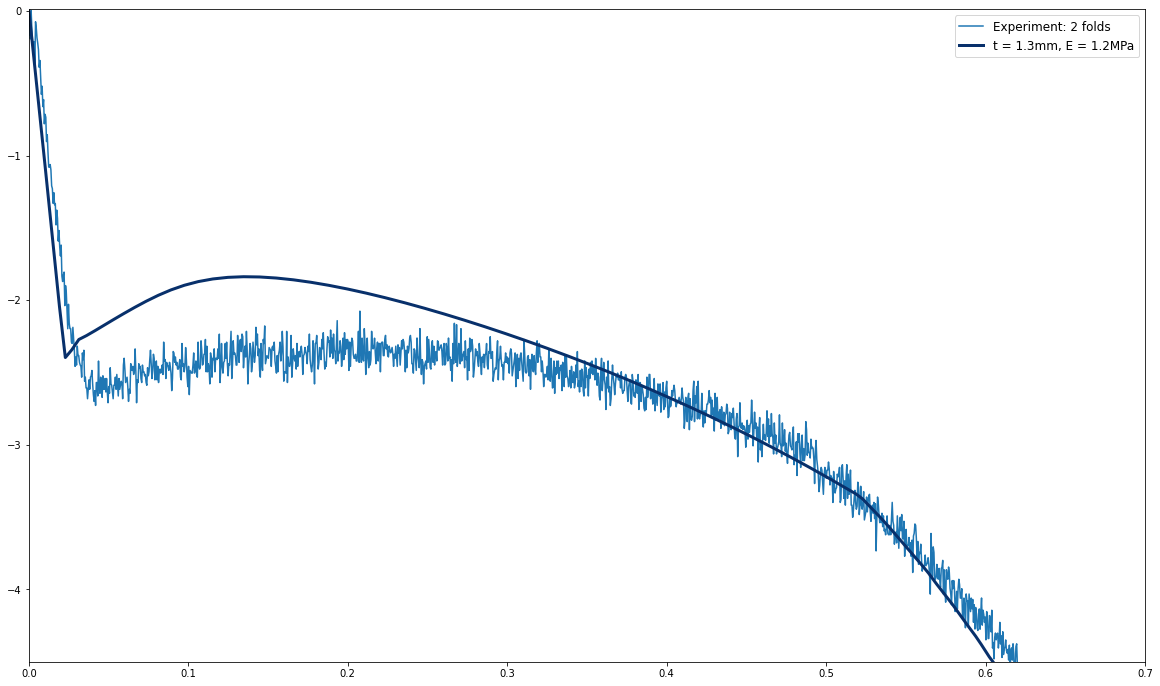

In [6]:
E_try = [1.2]
t_try = [1.3]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

initial_idx = 400


ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 2 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(t_try)*j + i
        data_cur = np.loadtxt(f'data_out/2fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])((j+1)/((len(E_try))))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)

ax.legend(loc = 'best', fontsize = 12);
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -4.5)

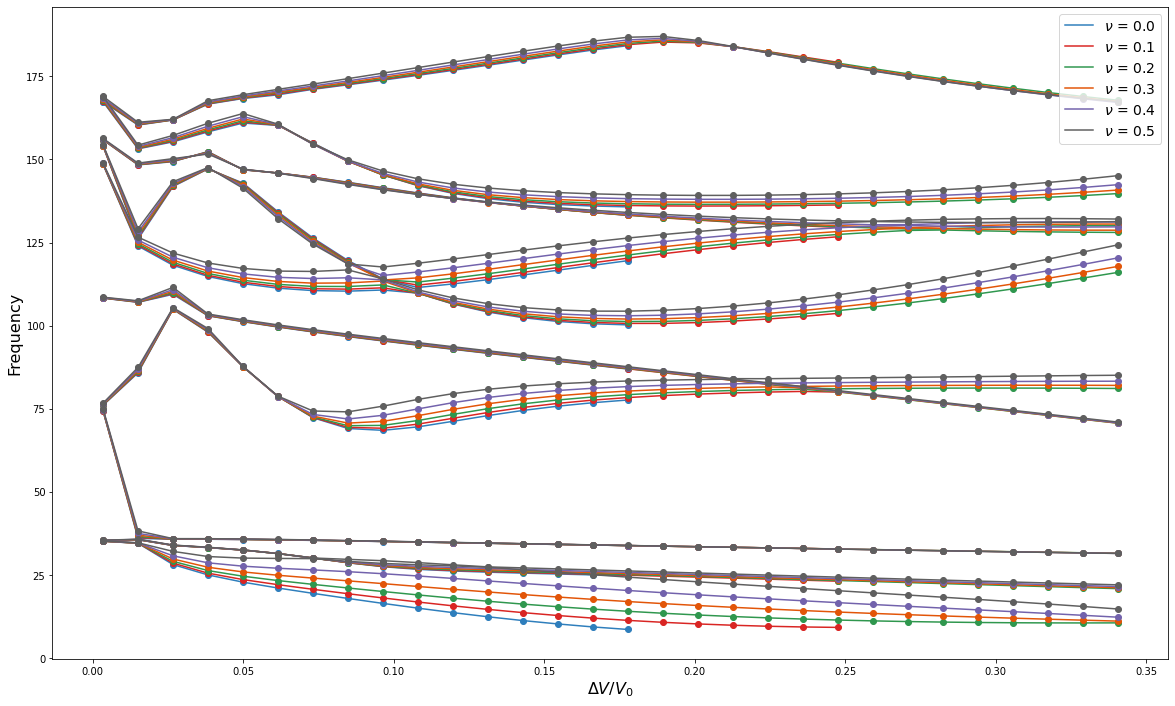

In [4]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 300

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

for i,nu in enumerate(nu_try):
    if nu >= 0.0:
        idx_cur = initial_idx + i
        data_path = f'data_out/2fold-test_nu-{idx_cur}_eig_freq.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)


fig.savefig('data_processed/change_nu_2folds_freq.jpg')


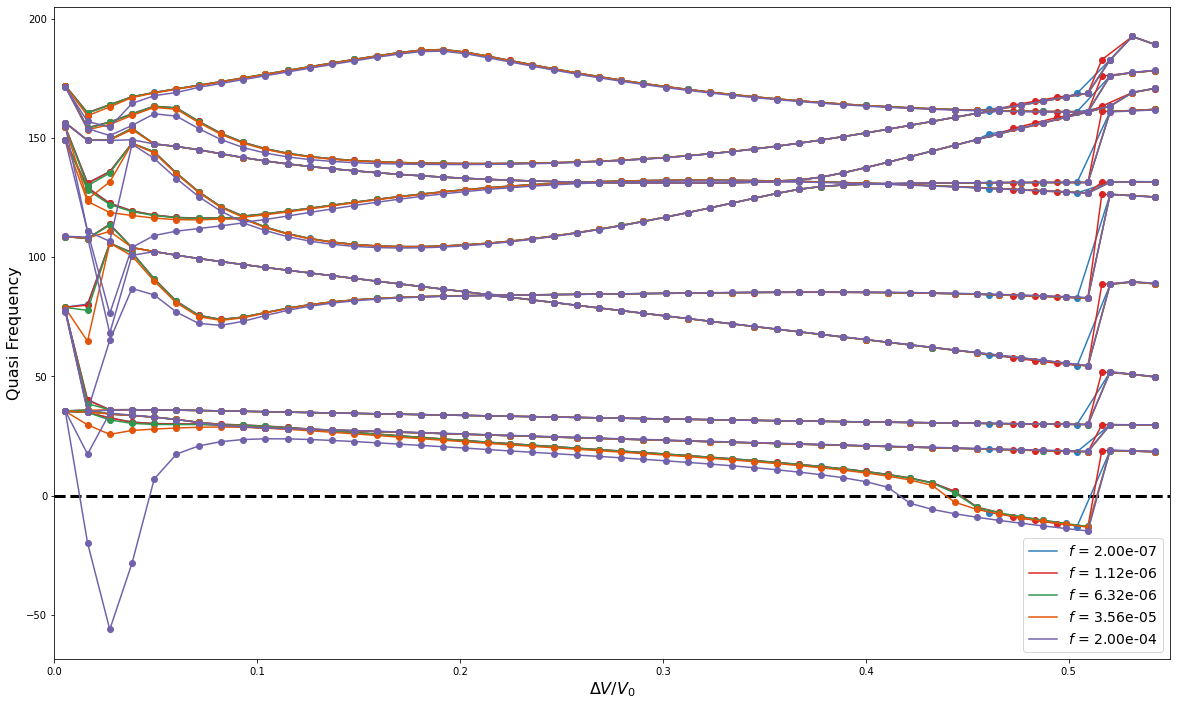

In [13]:
damping_sweep = 2*np.logspace(-7, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 100

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,stab_fac in enumerate(damping_sweep):
    try:
        idx_cur = initial_idx + i
        data_path = f'data_out/2fold-test_static-stable-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$f$ = {stab_fac:.2e}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)
    except: pass



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.55)


fig.savefig('data_processed/static_stable_2folds.jpg')
